# 10. 선형회귀(기타)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris

from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')


In [4]:
import pandas as pd
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

# 11. L1, L2 Norm

<img src="images/l1.svg"> <br>

## p = 1  L1 Norm
## p = 2  L2 Norm

https://en.wikipedia.org/wiki/Norm_(mathematics)

https://bskyvision.com/825


## L1 norm

In [14]:
np.random.seed(20)
data = np.random.randint(-5, 6, size = (2, 2))
data

array([[-2,  5],
       [ 5,  4]])

In [15]:
df = pd.DataFrame(data)
df

,0,1
0,-2,5
1,5,4


In [18]:
linalg.norm(df, ord = 1, axis = 1)

array([7., 9.])

## L2 norm

In [10]:
np.random.seed(20)
data = np.random.randint(1, 10, size = (3, 2))
data
df = pd.DataFrame(data)
df

,0,1
0,4,5
1,7,8
2,3,1


In [11]:
linalg.norm(df, ord = 2, axis = 1)


array([ 6.40312424, 10.63014581,  3.16227766])

## 릿지 회귀(Ridge Regression) L2규제

* 릿지 회귀는 선형 회귀를 개선한 선형 모델
* 릿지 회귀는 선형 회귀와 비슷하지만, 가중치의 값을 최대한 작게 만든다는 것이 다름
* 이러한 방법은 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
* 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
* 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
* 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음
* α=0이면 릿지회귀는 선형회귀와 같아지고, α가 커질수록 모든 가중치가 0에 가까워져 결국 데이터의 평균을 지나는 수평선이 된다.

$$ \begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation} $$

  + $\alpha$: 사용자가 지정하는 매개변수
  * $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐
  * p:특성의갯수


In [3]:
boston = load_boston()

boston_df = pd.DataFrame(  boston['data'],columns=boston['feature_names'])
boston_df['MEDV'] =boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
x_data = boston_df.iloc[:,:-1]
y_data = boston_df.iloc[:,-1]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 1)

In [6]:
y_train

42     25.3
58     23.3
385     7.2
78     21.2
424    11.7
       ... 
255    20.9
72     22.8
396    12.5
235    24.0
37     21.0
Name: MEDV, Length: 404, dtype: float64

In [23]:
model_ridge = make_pipeline(StandardScaler(), Ridge())
model_ridge.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [25]:
print(model_ridge.score(x_train, y_train))
print(model_ridge.score(x_test, y_test))

0.7293360329044442
0.7634038058032349


In [26]:
model_ridge5 = make_pipeline(StandardScaler(), Ridge(alpha = 5))
model_ridge5.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=5))])

In [27]:
print(model_ridge5.score(x_train, y_train))
print(model_ridge5.score(x_test, y_test))

0.7289067264142004
0.7629020804027657


## 라쏘 회귀(Lasso Regression) L1규제
​
​
* 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
* 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용
​
* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음
​
$$ \begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation} $$
​
* 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능
* p: 독립변수의 갯수

In [28]:
model_lasso = make_pipeline(StandardScaler(), Lasso())
model_lasso.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [29]:
print(model_lasso.score(x_train, y_train))
print(model_lasso.score(x_test, y_test))

0.6510370822546789
0.6546512972478653


In [30]:
model_lasso5 = make_pipeline(StandardScaler(), Lasso(alpha=5))
model_lasso5.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=5))])

In [31]:
print(model_lasso5.score(x_train, y_train))
print(model_lasso5.score(x_test, y_test))

0.2411098676402389
0.20844368630060406


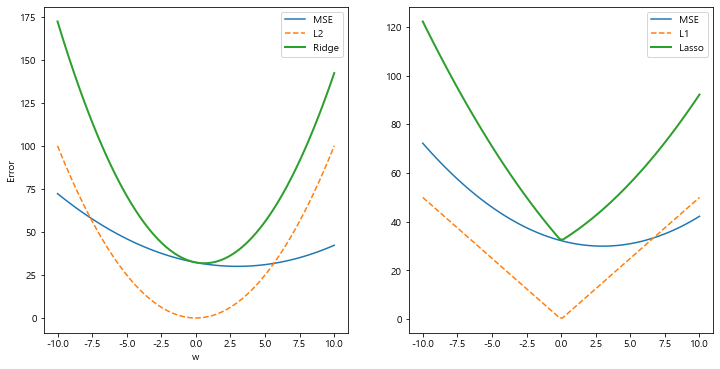

In [49]:
from sklearn.pipeline import Pipeline

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[12,6])

rng = np.linspace(-10,10,100)
mse = ( 0.5*(rng-3) )**2 + 30
l2 = rng**2
l1 = 5*np.abs(rng)
ridge = mse + l2
lasso = mse + l1

plt.subplot(1,2,1)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l2,'--',label='L2')
plt.plot(rng,ridge, lw=2, label='Ridge')
plt.xlabel('w'); plt.ylabel('Error')
plt.legend()

plt.subplot(1,2,2)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l1,'--',label='L1')
plt.plot(rng,lasso, lw=2, label='Lasso')
plt.legend()


In [7]:
from sklearn.pipeline import Pipeline

In [8]:
modelLasso = Pipeline( [ ('scl', StandardScaler()), ('clf', Lasso()) ] )
# param_value = {'clf_alpha' : [0.001, 0.01, 1, 2, 3, 4], 'scl_with_mean' : [True, False]}
param_value = {'clf__alpha' : [0.001, 0.01, 1, 2, 3, 4]}
gridSearch = GridSearchCV(modelLasso, param_grid = param_value, cv = 10, verbose = 1, scoring = 'r2')
gridSearch.fit(x_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('clf', Lasso())]),
             param_grid={'clf__alpha': [0.001, 0.01, 1, 2, 3, 4]}, scoring='r2',
             verbose=1)

In [10]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37
235,0.33045,0.0,6.20,0.0,0.507,6.086,61.5,3.6519,8.0,307.0,17.4,376.75,10.88


In [13]:
type(y_train)

pandas.core.series.Series

In [43]:
gridSearch.best_score_

0.6779423483447163

In [44]:
gridSearch.best_params_

{'clf__alpha': 0.01}

In [45]:
gridSearch.cv_results_

{'mean_fit_time': array([0.00495684, 0.00391901, 0.00417194, 0.00471466, 0.00380175,
        0.00411294]),
 'std_fit_time': array([0.00091615, 0.00046643, 0.00074951, 0.00148653, 0.00072551,
        0.00062059]),
 'mean_score_time': array([0.00178511, 0.0020515 , 0.00148163, 0.00231006, 0.00160971,
        0.00176063]),
 'std_score_time': array([0.00073065, 0.00051208, 0.0004608 , 0.00056766, 0.00070516,
        0.00041202]),
 'param_clf__alpha': masked_array(data=[0.001, 0.01, 1, 2, 3, 4],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__alpha': 0.001},
  {'clf__alpha': 0.01},
  {'clf__alpha': 1},
  {'clf__alpha': 2},
  {'clf__alpha': 3},
  {'clf__alpha': 4}],
 'split0_test_score': array([0.86741933, 0.8674495 , 0.74379226, 0.63721411, 0.49084771,
        0.3494708 ]),
 'split1_test_score': array([0.53857014, 0.53985541, 0.56511277, 0.53008636, 0.44409762,
        0.35941902]),
 'split2_test_score': a

In [48]:
gridSearch.best_estimator_

Pipeline(steps=[('scl', StandardScaler()), ('clf', Lasso(alpha=0.01))])

In [47]:
gridSearch.best_estimator_.predict(x_test)

array([32.47490159, 28.12987635, 17.99758874, 21.59467646, 18.78113215,
       19.9054232 , 32.24548395, 18.10731193, 24.28355458, 27.07276872,
       26.91811443, 28.84699137, 21.25821228, 26.78436789, 23.35425277,
       20.55737907, 17.31818837, 38.20107276, 30.49008317,  8.86690023,
       20.8036567 , 16.38064481, 25.21265174, 24.89868344, 31.33266735,
       10.7419558 , 13.88204311, 16.89019083, 36.48926363, 14.60805028,
       21.33716851, 13.96614295, 42.93446218, 17.9737495 , 22.0898439 ,
       20.714934  , 17.59898767, 27.30050043,  9.37526708, 19.74832155,
       24.6039903 , 21.25145519, 29.49189492, 16.24904175, 19.22623771,
       14.6501572 , 39.1377036 , 18.06654423, 25.84809473, 20.44186795,
       25.11177946, 24.39847463, 25.12406209, 26.58879586,  4.82750881,
       24.00969384, 10.90593883, 26.89589097, 16.92873279, 35.8638718 ,
       19.53784819, 27.53852396, 16.52302842, 18.71106844, 11.21959849,
       32.33423855, 36.70207163, 22.33109429, 24.50027637, 25.06

## 신축망 (Elastic-Net)

* 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌

* 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

$$ \begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation} $$

  + $\alpha$: 규제의 강도를 조절하는 매개변수
  + $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수


In [50]:
model_elastic = make_pipeline(StandardScaler(), ElasticNet())
model_elastic.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet())])

In [51]:
print(model_elastic.score(x_train, y_train))
print(model_elastic.score(x_test, y_test))

0.635207359597604
0.6285547370483677


In [55]:
# alpha = 1.0, l1_ratio = 0.5
# grid search를 이용하여 최적의 alpha와 l1 ratio 구하라
modelelastic = Pipeline( [ ('scl', StandardScaler()), ('clf', ElasticNet()) ] )
# param_value = {'clf_alpha' : [0.001, 0.01, 1, 2, 3, 4], 'scl_with_mean' : [True, False]}
param_value = {'clf__alpha' : [0.001, 0.01, 1, 2, 3, 4], 'clf__l1_ratio' : [0.1, 0.5, 1]}
gridSearch = GridSearchCV(modelelastic, param_grid = param_value, cv = 10, verbose = 1, scoring = 'r2')
gridSearch.fit(x_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    1.1s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('clf', ElasticNet())]),
             param_grid={'clf__alpha': [0.001, 0.01, 1, 2, 3, 4],
                         'clf__l1_ratio': [0.1, 0.5, 1]},
             scoring='r2', verbose=1)

In [56]:
gridSearch.best_estimator_

Pipeline(steps=[('scl', StandardScaler()),
                ('clf', ElasticNet(alpha=0.01, l1_ratio=1))])

In [57]:
gridSearch.best_params_

{'clf__alpha': 0.01, 'clf__l1_ratio': 1}

## 다항 회귀 (Polynomial Regression)

* 입력 데이터를 비선형 변환 후 사용하는 방법
* 모델 자체는 선형 모델

$$ \begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_1^2 + w_5 x_2^2
\end{equation} $$

$ * 차수(차수 2는 2번곱함 x^2, 차수3은 3번곱합 x^3)가  $<br>
높아질수록 더 복잡한 데이터 학습 가능

![polynomial regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_polynomial_interpolation_0011.png)


In [58]:
model = make_pipeline(PolynomialFeatures(degree = 2), StandardScaler(), LinearRegression())
model.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [59]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9264046957163292
0.911624405563433


# 12. 문자열 encoding

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris

from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')

In [123]:
train_df = pd.read_excel('data4/hyundaiCar.xlsx', sheet_name='train')
test_df = pd.read_excel('data4/hyundaiCar.xlsx', sheet_name='test')

In [124]:
train_df

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...,...
66,3802,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
67,1270,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
68,2430,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
69,2870,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동


In [125]:
x_train = train_df.iloc[:, 1:]
y_train = train_df['가격']

In [126]:
x_train

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...
66,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
67,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
68,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
69,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동


In [66]:
y_train

0     1885
1     2190
2     1135
3     1645
4     1960
      ... 
66    3802
67    1270
68    2430
69    2870
70    3254
Name: 가격, Length: 71, dtype: int64

In [67]:
x_test = test_df.iloc[:, 1:]
y_test = test_df['가격']

In [68]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [69]:
x_train['종류']

0     준중형
1     준중형
2      소형
3      소형
4      대형
     ... 
66     중형
67     소형
68    준중형
69     중형
70     대형
Name: 종류, Length: 71, dtype: object

## Label Encoder

In [71]:
lbl = LabelEncoder()
x_trainLabel = lbl.fit_transform(x_train['종류'])
x_trainLabel

array([2, 2, 1, 1, 0, 3, 3, 1, 3, 1, 2, 3, 2, 0, 1, 0, 0, 0, 3, 0, 0, 3,
       2, 0, 3, 3, 3, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 0, 0,
       0, 2, 1, 0, 2, 1, 3, 3, 0, 2, 2, 0, 3, 2, 0, 0, 2, 0, 1, 0, 0, 1,
       3, 1, 2, 3, 0])

In [72]:
lbl.classes_

array(['대형', '소형', '준중형', '중형'], dtype=object)

In [73]:
lbl.classes_[2]

'준중형'

In [74]:
lbl.transform(['준중형'])

array([2], dtype=int64)

## onehot encooder (0과 1로 구성)

In [76]:
oneH = OneHotEncoder()
x_trainOne = oneH.fit_transform(x_train['종류'].values.reshape(-1, 1))
x_trainOne

<71x4 sparse matrix of type '<class 'numpy.float64'>'
	with 71 stored elements in Compressed Sparse Row format>

In [77]:
type(x_trainOne)

scipy.sparse.csr.csr_matrix

In [78]:
x_trainOne.toarray()

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],


In [79]:
oneH.categories_

[array(['대형', '소형', '준중형', '중형'], dtype=object)]

## 판다스 dummpy

In [81]:
pd.get_dummies(x_train['종류'])

,대형,소형,준중형,중형
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
66,0,0,0,1
67,0,1,0,0
68,0,0,1,0
69,0,0,0,1


In [82]:
pd.get_dummies(x_train)

,년식,연비,마력,토크,하이브리드,배기량,중량,종류_대형,종류_소형,종류_준중형,종류_중형,연료_LPG,연료_가솔린,연료_디젤,변속기_수동,변속기_자동
0,2015,11.8,172,21.0,0,1999,1300,0,0,1,0,0,1,0,0,1
1,2015,12.3,204,27.0,0,1591,1300,0,0,1,0,0,1,0,0,1
2,2015,15.0,100,13.6,0,1368,1035,0,1,0,0,0,1,0,1,0
3,2014,14.0,140,17.0,0,1591,1090,0,1,0,0,0,1,0,0,1
4,2015,9.6,175,46.0,0,2497,1990,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2015,8.5,290,34.8,0,3342,1901,0,0,0,1,0,1,0,0,1
67,2012,13.3,108,13.9,0,1396,1040,0,1,0,0,0,1,0,0,1
68,2015,12.8,186,41.0,0,1995,1665,0,0,1,0,0,0,1,0,1
69,2015,17.7,156,19.3,1,1999,1585,0,0,0,1,0,1,0,0,1


In [84]:
pd.get_dummies(x_train, columns = ['연료', '변속기'])

,년식,종류,연비,마력,토크,하이브리드,배기량,중량,연료_LPG,연료_가솔린,연료_디젤,변속기_수동,변속기_자동
0,2015,준중형,11.8,172,21.0,0,1999,1300,0,1,0,0,1
1,2015,준중형,12.3,204,27.0,0,1591,1300,0,1,0,0,1
2,2015,소형,15.0,100,13.6,0,1368,1035,0,1,0,1,0
3,2014,소형,14.0,140,17.0,0,1591,1090,0,1,0,0,1
4,2015,대형,9.6,175,46.0,0,2497,1990,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2015,중형,8.5,290,34.8,0,3342,1901,0,1,0,0,1
67,2012,소형,13.3,108,13.9,0,1396,1040,0,1,0,0,1
68,2015,준중형,12.8,186,41.0,0,1995,1665,0,0,1,0,1
69,2015,중형,17.7,156,19.3,1,1999,1585,0,1,0,0,1


## replace

In [87]:
x_train['종류'].replace( ['대형', '중형', '준중형', '소형'], [0, 1, 2, 3])

0     2
1     2
2     3
3     3
4     0
     ..
66    1
67    3
68    2
69    1
70    0
Name: 종류, Length: 71, dtype: int64

# 연습문제
- 라벨인코딩을 이용하여
- 2015, 준중형, 12.3, 204, 27, 가솔린, 0, 1591, 1300, 자동 자동차가격 예측`

In [127]:
x_train

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...
66,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
67,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
68,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
69,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동


In [95]:
x_train['년식'].value_counts()

2015    54
2014     6
2012     4
2011     4
2013     3
Name: 년식, dtype: int64

In [97]:
x_train_numeric = x_train[['년식', '연비', '마력', '토크', '배기량', '중량']]
x_train_category = x_train[['종류', '연료', '변속기']]

In [98]:
x_train_category_onehot = pd.get_dummies(x_train_category)
x_train_category_onehot

,종류_대형,종류_소형,종류_준중형,종류_중형,연료_LPG,연료_가솔린,연료_디젤,변속기_수동,변속기_자동
0,0,0,1,0,0,1,0,0,1
1,0,0,1,0,0,1,0,0,1
2,0,1,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
66,0,0,0,1,0,1,0,0,1
67,0,1,0,0,0,1,0,0,1
68,0,0,1,0,0,0,1,0,1
69,0,0,0,1,0,1,0,0,1


In [109]:
scale_x = StandardScaler()
x_train_numeric_scale = scale_x.fit_transform(x_train_numeric)

In [110]:
x_train_numeric_scale_df = pd.DataFrame(x_train_numeric_scale, columns = ['년식', '연비', '마력', '토크', '배기량', '중량'])
x_train_numeric_scale_df

,년식,연비,마력,토크,배기량,중량
0,0.485858,-0.179427,-0.060023,-0.700247,-0.224653,-0.769861
1,0.485858,-0.019786,0.466513,-0.202657,-0.821968,-0.769861
2,0.485858,0.842271,-1.244729,-1.313941,-1.148441,-1.497016
3,-0.376540,0.522991,-0.586559,-1.031974,-0.821968,-1.346097
4,0.485858,-0.881844,-0.010660,1.373045,0.504422,1.123486
...,...,...,...,...,...,...
66,0.485858,-1.233053,1.881577,0.444210,1.741508,0.879272
67,-2.101335,0.299494,-1.113095,-1.289062,-1.107449,-1.483296
68,0.485858,0.139854,0.170336,0.958386,-0.230509,0.231692
69,0.485858,1.704329,-0.323291,-0.841231,-0.224653,0.012174


In [128]:
x_train = pd.concat([x_train_numeric_scale_df, x_train_category_onehot, x_train[['하이브리드']]], axis = 1)
x_train

,년식,연비,마력,토크,배기량,중량,종류_대형,종류_소형,종류_준중형,종류_중형,연료_LPG,연료_가솔린,연료_디젤,변속기_수동,변속기_자동,하이브리드
0,0.485858,-0.179427,-0.060023,-0.700247,-0.224653,-0.769861,0,0,1,0,0,1,0,0,1,0
1,0.485858,-0.019786,0.466513,-0.202657,-0.821968,-0.769861,0,0,1,0,0,1,0,0,1,0
2,0.485858,0.842271,-1.244729,-1.313941,-1.148441,-1.497016,0,1,0,0,0,1,0,1,0,0
3,-0.376540,0.522991,-0.586559,-1.031974,-0.821968,-1.346097,0,1,0,0,0,1,0,0,1,0
4,0.485858,-0.881844,-0.010660,1.373045,0.504422,1.123486,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.485858,-1.233053,1.881577,0.444210,1.741508,0.879272,0,0,0,1,0,1,0,0,1,0
67,-2.101335,0.299494,-1.113095,-1.289062,-1.107449,-1.483296,0,1,0,0,0,1,0,0,1,0
68,0.485858,0.139854,0.170336,0.958386,-0.230509,0.231692,0,0,1,0,0,0,1,0,1,0
69,0.485858,1.704329,-0.323291,-0.841231,-0.224653,0.012174,0,0,0,1,0,1,0,0,1,1


In [137]:
model_hyundai = ElasticNet()
model_hyundai.fit(x_train, y_train)

ElasticNet()

In [134]:
# 2015, 준중형, 12.3, 204, 27, 가솔린, 0, 1591, 1300, 자동
# 준중형 : [0, 0, 1, 0], 가솔린 : [0, 1, 0], 자동 : [0, 1]
# standardscale
xd = scale_x.transform([[2015, 12.3, 204, 27, 1591, 1300]])
xd

[array([[ 0.48585783, -0.0197864 ,  0.46651253, -0.20265698, -0.82196755,
         -0.76986063]]),
 1]

In [138]:
model_hyundai.predict([[0.48585783, -0.0197864 ,  0.46651253, -0.20265698, -0.82196755, -0.76986063, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]])

array([2402.78413025])

In [147]:
x_train = train_df.iloc[:,1:]
y_train = train_df['가격']

x_test = test_df.iloc[:,1:]
y_test = test_df['가격']

#라벨 인코딩
labelkinds , labelfuel, labelmission = LabelEncoder(), LabelEncoder(), LabelEncoder()
x_train['종류'] = labelkinds.fit_transform(x_train['종류'])
x_train['연료'] = labelfuel.fit_transform(x_train['연료'])
x_train['변속기'] = labelmission.fit_transform(x_train['변속기'])

#모델
modelElastic = Pipeline([ ('scl',StandardScaler()), ('clf', ElasticNet()) ])
param_value = {
    'clf__alpha': [0.001,0.01,1,2,3,4],
    'clf__l1_ratio' : [0.4,0.5,0.6,0.7],
}

gridSearch = GridSearchCV( modelElastic, param_grid= param_value, cv = 10, n_jobs = -1,verbose = 1)
gridSearch.fit(x_train, y_train)

print(gridSearch.best_score_)
print(gridSearch.best_params_)

kinds = labelkinds.transform(['준중형'])[0]
fuel = labelfuel.transform(['가솔린'])[0]
mission = labelmission.transform(['자동'])[0]

result = gridSearch.best_estimator_.predict([[2015, kinds , 12.3,204, 27,fuel, 0, 1519, 1300, mission]])
print('예측 가격: ', result)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


0.5839143306366059
{'clf__alpha': 0.01, 'clf__l1_ratio': 0.4}
예측 가격:  [1952.23100494]


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.3s finished


## make_column_transformer

In [155]:
from sklearn.compose import make_column_transformer

In [169]:
x_train = train_df.iloc[:,1:]
y_train = train_df['가격']

x_test = test_df.iloc[:,1:]
y_test = test_df['가격']

In [170]:
x_train

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...
66,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
67,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
68,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
69,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동


In [171]:
myt = make_column_transformer((OneHotEncoder(), ['종류', '연료', '변속기']))
result = myt.fit_transform(x_train)
result

array([[0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0.

In [186]:
# model = Pipeline( [ ('myt', myt), ('scl', StandardScaler()), ('clf', Ridge())])
model = make_pipeline(myt, PolynomialFeatures(degree = 2),StandardScaler(), ElasticNet())
param_value = {'elasticnet__alpha' : [0.001, 0.01, 1, 2, 3], 'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 1.0]}
gridS = GridSearchCV(model, param_grid = param_value, scoring = 'r2')
gridS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['종류',
                                                                          '연료',
                                                                          '변속기'])])),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': [0.001, 0.01, 1, 2, 3],
                         'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 1.0]},
             scoring='r2')

In [173]:
x_train

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...
66,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
67,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
68,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
69,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동


In [181]:
gridS.best_params_

{'elasticnet__alpha': 1, 'elasticnet__l1_ratio': 0.5}

In [182]:
gridS.best_score_

0.12531389071867122

In [183]:
x_test.columns

Index(['년식', '종류', '연비', '마력', '토크', '연료', '하이브리드', '배기량', '중량', '변속기'], dtype='object')

In [187]:
xd = np.array( [[2015, '준중형', 12.3, 204, 27, '가솔린', 0, 1591, 1300, '자동']])
xdataF = pd.DataFrame(xd, columns = x_test.columns)
xdataF

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,준중형,12.3,204,27,가솔린,0,1591,1300,자동


In [188]:
gridS.best_estimator_.predict(xdataF)

array([2219.16922673])

# 13.sigmoid

In [189]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [190]:
print(2 ** 2)
print(2 ** 3)
print(2 ** -2)
print(2 ** -3)

4
8
0.25
0.125


In [191]:
math.e

2.718281828459045

In [192]:
def sigmoid(z) :
    return 1 / (1 + math.e ** - z)

In [193]:
print(sigmoid(-10))
print(sigmoid(-1))
print(sigmoid(0))
print(sigmoid(1))
print(sigmoid(10))
print(sigmoid(20))

4.539786870243442e-05
0.2689414213699951
0.5
0.7310585786300049
0.9999546021312976
0.9999999979388463


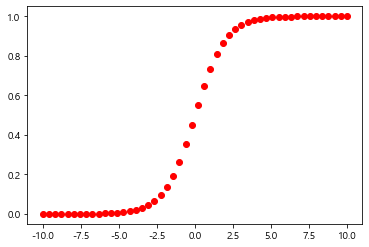

In [196]:
for z in np.linspace(-10, 10, 50) : 
    s = sigmoid(z)
    plt.plot(z, s, 'ro')

plt.show()

# 연습문제

## data4/프로야구.csv 를 이용하여 아래를 작성하시요.

- target: 2018년 연봉 
- 나머지:feature(선수명은 제거)


1) SGDRegress 모델의 r2 점수(train, test )를 출력하시요.

2) heatmap을그리고 다중공선성 컬럼을 확인하고 다중공선성이 높은 컬럼을 제거후 SGDRegress  모델의 r2 점수(train, test )를 출력하시요.

3) Lasso 모델을 이용하여 r2 점수(train, test )를 출력하시요.

4) 5) 6) 번  은 문제를 만들어서 데이터를 분석하시요 ( 예를 들어 연봉이 가장높은 top 5 선수명 연봉등)


## 기본 모듈과 데이터

In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris

from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')

In [199]:
df = pd.read_csv('data4/프로야구.csv')
df

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,2,5,0,0,2,33,5,62.2,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,노경은,롯데,0,2,0,0,0,9,2,14.2,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,김승현,삼성,0,3,0,1,0,41,0,43.2,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


In [313]:
df.columns

x_data = df.drop(['선수명', '연봉(2018)'], axis=1)
y_data = df['연봉(2018)']

## 1. SGDRegress 모델의 r2 점수(train, test )를 출력하시요.

In [286]:
# label encoder
lbl = LabelEncoder()
x_data['팀명'] = lbl.fit_transform(x_data['팀명'])

# train, test 분리
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.35, random_state = 1)


In [336]:
# modeling
model = make_pipeline(StandardScaler(), SGDRegressor())
model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [337]:
print('SGDRegressor train r2score : ', model.score(x_train, y_train))
print('SGDRegressor test r2score : ', model.score(x_test, y_test))

SGDRegressor train r2score :  0.9254385091501469
SGDRegressor test r2score :  0.8827261414649404


## 2. heatmap을그리고 다중공선성 컬럼을 확인하고 다중공선성이 높은 컬럼을 제거후 SGDRegress  모델의 r2 점수(train, test )를 출력하시요.

### heatmap

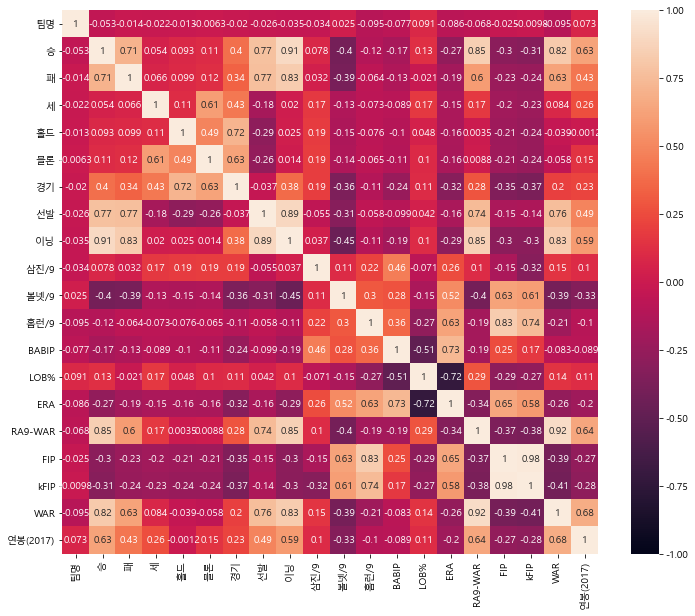

In [266]:
plt.figure(figsize = (12, 10))
sns.heatmap(x_data.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

### 다중공선성 확인

In [314]:
x_data_vif = x_data.drop('팀명', axis = 1)
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(x_data_vif.values, i )  for i in range(x_data_vif.shape[1]) ]
vif['features'] = x_data_vif.columns
vif

,VIF Factor,features
0,13.005953,승
1,10.593260,패
2,3.303690,세
3,4.846833,홀드
4,3.578651,블론
5,43.970237,경기
6,50.361572,선발
7,138.016798,이닝
8,560.722736,삼진/9
9,122.773018,볼넷/9


In [315]:
# FIP 제거
x_data_vif = x_data_vif.drop('FIP', axis = 1)
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(x_data_vif.values, i )  for i in range(x_data_vif.shape[1]) ]
vif['features'] = x_data_vif.columns
vif

,VIF Factor,features
0,12.978963,승
1,10.470640,패
2,3.303519,세
3,4.833551,홀드
4,3.577467,블론
5,43.943993,경기
6,50.332909,선발
7,135.954681,이닝
8,46.496021,삼진/9
9,18.381385,볼넷/9


In [316]:
# kFIP 제거
x_data_vif = x_data_vif.drop('kFIP', axis = 1)
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(x_data_vif.values, i )  for i in range(x_data_vif.shape[1]) ]
vif['features'] = x_data_vif.columns
vif

,VIF Factor,features
0,12.952050,승
1,10.469778,패
2,3.286497,세
3,4.805479,홀드
4,3.547565,블론
5,42.747619,경기
6,50.141245,선발
7,135.895660,이닝
8,12.101568,삼진/9
9,8.469169,볼넷/9


In [317]:
# 이닝 제거
x_data_vif = x_data_vif.drop('이닝', axis = 1)
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(x_data_vif.values, i )  for i in range(x_data_vif.shape[1]) ]
vif['features'] = x_data_vif.columns
vif

,VIF Factor,features
0,12.722995,승
1,10.272649,패
2,2.995484,세
3,4.455724,홀드
4,3.542872,블론
5,14.120776,경기
6,15.781080,선발
7,12.014940,삼진/9
8,8.434384,볼넷/9
9,5.019506,홈런/9


In [318]:
# BABIP 제거
x_data_vif = x_data_vif.drop('BABIP', axis = 1)
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(x_data_vif.values, i )  for i in range(x_data_vif.shape[1]) ]
vif['features'] = x_data_vif.columns
vif

,VIF Factor,features
0,12.717304,승
1,10.262881,패
2,2.993113,세
3,4.454751,홀드
4,3.542596,블론
5,14.108487,경기
6,15.741437,선발
7,10.215496,삼진/9
8,7.665564,볼넷/9
9,4.447631,홈런/9


In [319]:
# 선발 제거
x_data_vif = x_data_vif.drop('선발', axis = 1)
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(x_data_vif.values, i )  for i in range(x_data_vif.shape[1]) ]
vif['features'] = x_data_vif.columns
vif

,VIF Factor,features
0,11.327240,승
1,4.431809,패
2,2.743681,세
3,3.774030,홀드
4,3.418175,블론
5,13.610002,경기
6,10.200314,삼진/9
7,7.663918,볼넷/9
8,4.439783,홈런/9
9,12.557126,LOB%


In [320]:
# 경기 제거
x_data_vif = x_data_vif.drop('경기', axis = 1)
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(x_data_vif.values, i )  for i in range(x_data_vif.shape[1]) ]
vif['features'] = x_data_vif.columns
vif

,VIF Factor,features
0,9.762009,승
1,4.360636,패
2,2.342905,세
3,2.024790,홀드
4,3.371919,블론
5,10.026349,삼진/9
6,7.468005,볼넷/9
7,4.436430,홈런/9
8,10.570261,LOB%
9,8.129707,ERA


In [321]:
# RA9-WAR 제거
x_data_vif = x_data_vif.drop('RA9-WAR', axis = 1)
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(x_data_vif.values, i )  for i in range(x_data_vif.shape[1]) ]
vif['features'] = x_data_vif.columns
vif

,VIF Factor,features
0,7.627376,승
1,4.231583,패
2,2.112913,세
3,2.019536,홀드
4,3.286910,블론
5,9.913243,삼진/9
6,7.467992,볼넷/9
7,4.374986,홈런/9
8,10.151723,LOB%
9,7.917416,ERA


In [322]:
# LOB% 제거
x_data_vif = x_data_vif.drop('LOB%', axis = 1)
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(x_data_vif.values, i )  for i in range(x_data_vif.shape[1]) ]
vif['features'] = x_data_vif.columns
vif

,VIF Factor,features
0,7.473606,승
1,4.037793,패
2,2.106612,세
3,2.013483,홀드
4,3.278729,블론
5,7.129908,삼진/9
6,5.077176,볼넷/9
7,4.300514,홈런/9
8,6.990615,ERA
9,5.902996,WAR


#### FIP, kFIP, 이닝, BABIP, 선발, LOB%, RA9-WAR, 경기 열 제거

### 다중공선성 높은 컬럼 제거 후 SGDRegress 모델의 r2 점수 출력

In [290]:
# train, test 분리
x_train_vif, x_test_vif, y_train, y_test = train_test_split(x_data_vif, y_data, test_size = 0.35, random_state = 1)

# modeling
model = make_pipeline(StandardScaler(), SGDRegressor())
model.fit(x_train_vif, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [291]:
print('SGDRegressor train_vif r2score : ', model.score(x_train_vif, y_train))
print('SGDRegressor test_vif r2score : ', model.score(x_test_vif, y_test))

SGDRegressor train_vif r2score :  0.9191879675910127
SGDRegressor test_vif r2score :  0.8910917780709616


## 3. Lasso 모델을 이용하여 r2 점수(train, test )를 출력하시요.

In [294]:
# modeling
model = make_pipeline(StandardScaler(), Lasso())
# model.fit(x_train, y_train)
param_value = {'lasso__alpha' : [0.001, 0.01, 1, 2, 3]}
gridS = GridSearchCV(model, param_grid = param_value, scoring = 'r2')
gridS.fit(x_train, y_train)

# model = make_pipeline(myt, PolynomialFeatures(degree = 2),StandardScaler(), ElasticNet())
# param_value = {'elasticnet__alpha' : [0.001, 0.01, 1, 2, 3], 'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 1.0]}
# gridS = GridSearchCV(model, param_grid = param_value, scoring = 'r2')
# gridS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.001, 0.01, 1, 2, 3]}, scoring='r2')

In [295]:
gridS.best_params_

{'lasso__alpha': 3}

In [300]:
print('Lasso train r2score : ', gridS.score(x_train, y_train))
print('Lasso test r2score : ', gridS.score(x_test, y_test))

Lasso train r2score :  0.9348730922551662
Lasso test r2score :  0.7346838467048161


## 4. 2017년과 2018년을 비교했을 때 연봉 인상이 큰 5명의 선수 추출

In [302]:
df

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,2,5,0,0,2,33,5,62.2,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,노경은,롯데,0,2,0,0,0,9,2,14.2,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,김승현,삼성,0,3,0,1,0,41,0,43.2,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


In [331]:
df['연봉차이'] = df['연봉(2018)'] - df['연봉(2017)']
df.sort_values('연봉차이', ascending= False).head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017),연봉차이
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000,80000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000,70000
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000,55000
5,피어밴드,KT,8,10,0,0,0,26,26,160.0,...,0.289,76.1,3.04,6.52,4.42,4.32,3.94,85000,35000,50000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000,26000


## 5. SGDRegress 모델과 Lasso 모델로 예측값 비교

In [352]:
df.loc[36]

선수명           임창용
팀명            KIA
승               8
패               6
세               7
홀드              9
블론              5
경기             51
선발              0
이닝             50
삼진/9        10.44
볼넷/9         3.96
홈런/9         0.54
BABIP       0.356
LOB%         75.9
ERA          3.78
RA9-WAR       1.4
FIP          3.69
kFIP         3.35
WAR          0.96
연봉(2018)    50000
연봉(2017)    50000
연봉차이            0
Name: 36, dtype: object

In [345]:
x_train

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
36,0,8,6,7,9,5,51,0,50.0,10.44,3.96,0.54,0.356,75.9,3.78,1.40,3.69,3.35,0.96,50000
118,1,0,0,0,1,0,12,0,18.0,5.50,2.50,2.00,0.339,84.8,3.50,0.30,6.23,6.31,-0.08,4000
150,7,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,2900
108,8,0,0,0,0,0,14,0,14.1,6.28,1.88,1.26,0.333,79.2,4.40,0.25,5.41,5.58,-0.04,2700
12,0,8,6,0,0,0,23,19,118.1,5.55,1.37,0.68,0.331,72.3,3.65,4.25,4.07,4.19,2.79,3100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0,7,4,11,6,6,65,1,80.1,7.39,5.27,1.12,0.267,75.0,4.59,1.89,5.54,5.53,-0.20,4700
137,6,3,1,0,2,1,24,0,26.2,3.71,2.70,1.69,0.307,71.4,5.40,0.19,6.47,6.83,-0.24,15000
72,1,0,2,0,0,0,4,3,11.1,6.35,4.76,0.00,0.400,50.0,9.53,-0.13,4.44,4.67,0.18,3000
140,1,0,2,0,1,0,37,1,39.0,5.08,3.92,1.62,0.294,68.3,6.23,0.25,6.40,6.63,-0.28,6300


In [344]:
x_train.values[0]

array([0.000e+00, 8.000e+00, 6.000e+00, 7.000e+00, 9.000e+00, 5.000e+00,
       5.100e+01, 0.000e+00, 5.000e+01, 1.044e+01, 3.960e+00, 5.400e-01,
       3.560e-01, 7.590e+01, 3.780e+00, 1.400e+00, 3.690e+00, 3.350e+00,
       9.600e-01, 5.000e+04])

In [347]:
model.predict([x_train.values[0]])

array([55783.78001336])

In [354]:
gridS.predict([x_train.values[0]])

array([39944.72101816])

In [307]:
df.iloc[0]

선수명             켈리
팀명              SK
승               16
패                7
세                0
홀드               0
블론               0
경기              30
선발              30
이닝             190
삼진/9          8.95
볼넷/9          2.13
홈런/9          0.76
BABIP        0.342
LOB%          73.7
ERA            3.6
RA9-WAR       6.91
FIP           3.69
kFIP          3.44
WAR           6.62
연봉(2018)    140000
연봉(2017)     85000
Name: 0, dtype: object

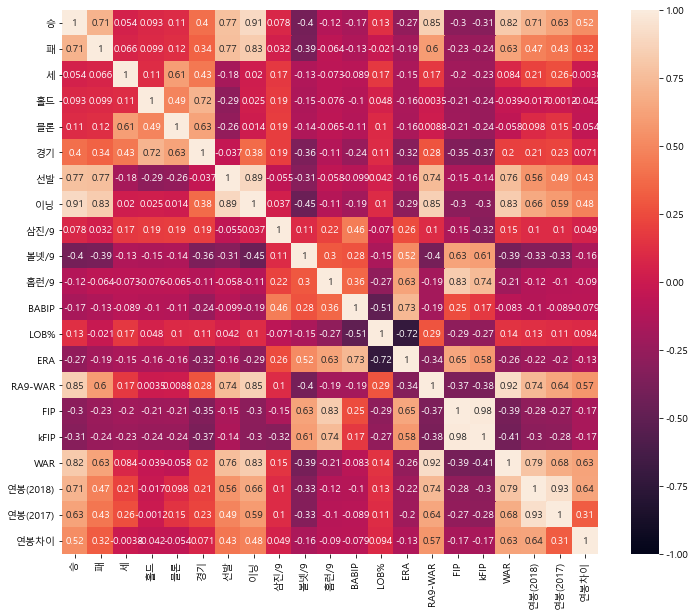

In [359]:
df_corr = df.drop(['선수명', '팀명'], axis = 1)
plt.figure(figsize=(12,10))
sns.heatmap(df_corr.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

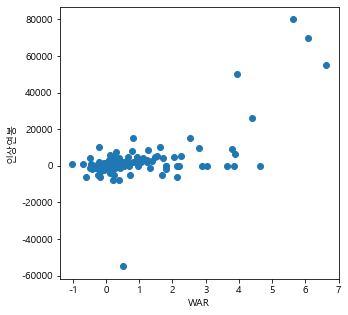

In [360]:
#연봉 차이와 가장 상관관계가 높은 feature 찾기
df.corr()['연봉차이'].sort_values(ascending = False)

# 연봉 차이와 war와의 그래프
plt.figure(figsize = (5,5))
plt.scatter(df['WAR'], df['연봉차이'])
plt.ylabel('인상연봉')
plt.xlabel('WAR')
plt.show()